In [1]:
%matplotlib inline
# %config InlineBackend.figure_format='retina'
import dask.dataframe as dd
import numpy as np
import pandas as pd
# import seaborn as sgn
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

In [12]:
plt.rcParams['savefig.dpi'] = 125

In [2]:
# df = dd.read_parquet('/bigdata/citibike.parquet')
# df.set_index('start_time', npartitions='auto').to_parquet('/bigdata/citibike_repartitioned.parquet')

In [22]:
df = dd.read_parquet('/bigdata/citibike_repartitioned.parquet')

In [23]:
def get_is_bus_day(x):
    return np.is_busday(x.index.values.astype('<M8[D]'))

def get_day(x):
    return pd.to_datetime(x.index.values.astype('<M8[D]').astype(str), infer_datetime_format=True)

def get_week(x):
    return pd.to_datetime(x.index.values.astype('<M8[W]').astype(str), infer_datetime_format=True)


df['year_month_day'] = (df.map_partitions(get_day, meta=('year_month_day', '<M8[ns]')))
df['year_month_week'] = (df.map_partitions(get_week, meta=('year_month_week', '<M8[ns]')))
df['is_bus_day'] = df.map_partitions(get_is_bus_day, meta=('is_bus_day', np.bool))

In [24]:
df[df.is_bus_day == False].head()

,trip_duration,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_taxizone_id,end_taxizone_id,year_month_day,year_month_week,is_bus_day
start_time,,,,,,,,,,,,,,,,,,,
2013-07-06 00:00:43,1593,2013-07-06 00:27:16,224,Spruce St & Nassau St,40.711464,-74.005524,232,Cadman Plaza E & Tillary St,40.695977,-73.990149,15355,Customer,NaN,0,209.0,65.0,2013-07-06,2013-07-04,False
2013-07-06 00:00:49,173,2013-07-06 00:03:42,482,W 15 St & 7 Ave,40.739355,-73.999318,482,W 15 St & 7 Ave,40.739355,-73.999318,14850,Subscriber,1958.0,1,90.0,90.0,2013-07-06,2013-07-04,False
2013-07-06 00:00:56,1494,2013-07-06 00:25:50,282,Kent Ave & S 11 St,40.708273,-73.968341,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,16233,Customer,NaN,0,256.0,255.0,2013-07-06,2013-07-04,False
2013-07-06 00:01:08,938,2013-07-06 00:16:46,164,E 47 St & 2 Ave,40.753231,-73.970325,2022,E 59 St & Sutton Pl,40.758491,-73.959206,20186,Customer,NaN,0,233.0,140.0,2013-07-06,2013-07-04,False
2013-07-06 00:01:10,349,2013-07-06 00:06:59,229,Great Jones St,40.727434,-73.993790,428,E 3 St & 1 Ave,40.724677,-73.987834,15735,Subscriber,1986.0,1,114.0,79.0,2013-07-06,2013-07-04,False


In [26]:
timedf = df['trip_duration year_month_day'.split()].groupby('year_month_day').count().compute()
timedf_wk = df['trip_duration year_month_week'.split()].groupby('year_month_week').count().compute()

In [58]:
timedf2 = df['trip_duration year_month_day'.split()][df.user_type == 'Customer'].groupby('year_month_day').count().compute()
timedf2_wk = df['trip_duration year_month_week'.split()][df.user_type=='Customer'].groupby('year_month_week').count().compute()

In [60]:
timedf3 = df['trip_duration year_month_day'.split()][df.user_type == 'Subscriber'].groupby('year_month_day').count().compute()
timedf3_wk = df['trip_duration year_month_week'.split()][df.user_type=='Subscriber'].groupby('year_month_week').count().compute()

In [7]:
import matplotlib.dates as mdates


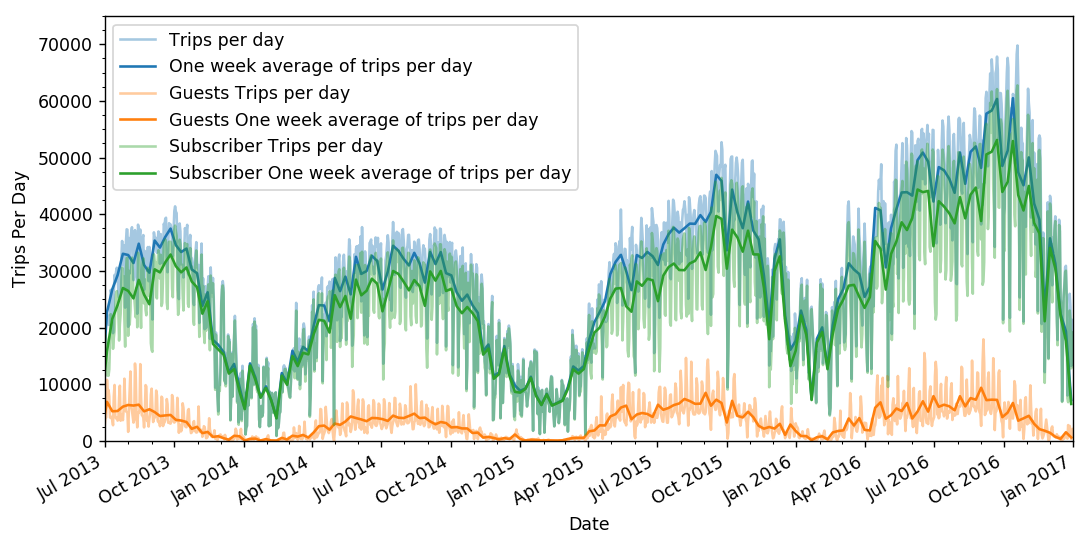

In [100]:
plt.plot(timedf.index.values, timedf.trip_duration, alpha=0.4, color='C0', label='Trips per day')
plt.plot(timedf_wk.index.values, timedf_wk.trip_duration/7., color='C0', alpha=1, label='One week average of trips per day')

plt.plot(timedf2.index.values, timedf2.trip_duration, alpha=0.4, color='C1', label='Guests Trips per day')
plt.plot(timedf2_wk.index.values, timedf2_wk.trip_duration/7., color='C1', alpha=1, label='Guests One week average of trips per day')

plt.plot(timedf3.index.values, timedf3.trip_duration, alpha=0.4, color='C2', label='Subscriber Trips per day')
plt.plot(timedf3_wk.index.values, timedf3_wk.trip_duration/7., color='C2', alpha=1, label='Subscriber One week average of trips per day')

plt.xlabel('Date')
plt.ylabel("Trips Per Day")
plt.gcf().set_size_inches(10, 5)

# years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%b %Y')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(yearsFmt)

ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10000))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(2500))

plt.legend(loc='upper left')

plt.xlim('2013-07-01', '2017-01-01')
# plt.xlim('2016-06-01', '2016-08-01')
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
# ax.xaxis.set_major_formatter(yearsFmt)


plt.ylim(0, 75000)
# ax.xaxis.set_minor_locator(months)

plt.gcf().autofmt_xdate()


In [44]:
weather_df = pd.read_csv('../central_park_weather.csv.gz')

In [53]:
weather_df['DATE'] = pd.to_datetime(weather_df.DATE, format='%Y%m%d')

In [64]:
merged_counts = timedf.merge(weather_df['DATE PRCP SNWD SNOW TMAX TMIN AWND'.split()], left_index=True, right_on='DATE', how='left')

In [73]:
merged_counts.columns = ['N', 'DATE', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN',
       'AWND']

In [81]:
import statsmodels.api
import statsmodels.formula.api
from patsy import standardize as st

In [91]:
model = statsmodels.formula.api.ols(formula="N ~ st(PRCP) + st(SNWD) + st(SNOW) + st(TMAX) + st(TMIN)", data=merged_counts)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      N   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     308.9
Date:                Fri, 19 May 2017   Prob (F-statistic):          1.81e-216
Time:                        15:09:19   Log-Likelihood:                -13493.
No. Observations:                1276   AIC:                         2.700e+04
Df Residuals:                    1270   BIC:                         2.703e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.892e+04    265.571    108.898      0.000      2.84e+04  2.94e+04
st(PRCP)   -3210.2392    273.517    -11.737      0.000     -3746.835 -2673.644
st(SNWD)   -2102.8777    299.407     -7.023      0.000     -2690.265 -1515.490
st(SNOW)    -182.5400    284.662     -0.641      0.521      -741.000   375.920
st(TMAX)    8357.3333   1012.308      8.256      0.000      6371.353  1.03e+04
st(TMIN)     422.5314   1020.685      0.414      0.679     -1579.882  2424.945
==============================================================================
Omnibus:                      126.581   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.763
Skew:                           0.797   Prob(JB):                     2.26e-37
Kurtosis:                       3.798   Cond. No.                         8.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
model = statsmodels.formula.api.ols(formula="N ~ st(PRCP) + st(SNWD) + st(SNOW) + st(TMAX) + st(TMIN)", data=merged_counts)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      N   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     308.9
Date:                Fri, 19 May 2017   Prob (F-statistic):          1.81e-216
Time:                        15:10:17   Log-Likelihood:                -13493.
No. Observations:                1276   AIC:                         2.700e+04
Df Residuals:                    1270   BIC:                         2.703e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.892e+04    265.571    108.898      0.000      2.84e+04  2.94e+04
st(PRCP)   -3210.2392    273.517    -11.737      0.000     -3746.835 -2673.644
st(SNWD)   -2102.8777    299.407     -7.023      0.000     -2690.265 -1515.490
st(SNOW)    -182.5400    284.662     -0.641      0.521      -741.000   375.920
st(TMAX)    8357.3333   1012.308      8.256      0.000      6371.353  1.03e+04
st(TMIN)     422.5314   1020.685      0.414      0.679     -1579.882  2424.945
==============================================================================
Omnibus:                      126.581   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.763
Skew:                           0.797   Prob(JB):                     2.26e-37
Kurtosis:                       3.798   Cond. No.                         8.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
help(statsmodels.api.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  A simple ordinary least squares model.
 |  
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The dependent variable.
 |  exog : array-like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none.'
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result statistics are calculated as if a constant is present.

In [49]:
df2[['is_bus_day', 'start_station_id']][df2.is_bus_day == True].groupby('start_station_id') \
    .count().compute().sort_values('is_bus_day', ascending=False)

,is_bus_day
start_station_id,
519,356749
497,235838
521,233325
435,228568
293,214210
402,208014
490,206323
477,199371
426,196368


In [50]:
zz = df2[['start_station_id', 'is_bus_day', 'start_time', 'start_station_name']].groupby('start_station_id') \
 .count().compute().sort_values('is_bus_day', ascending=False)
zz

,is_bus_day,start_time,start_station_name
start_station_id,,,
519,397813,397813,397813
497,315510,315510,315510
435,299698,299698,299698
426,280868,280868,280868
293,279981,279981,279981
521,268807,268807,268807
285,266162,266162,266162
402,260880,260880,260880
151,247791,247791,247791


In [51]:
zz[zz.is_bus_day>500].index

Int64Index([ 519,  497,  435,  426,  293,  521,  285,  402,  151,  490,
            ...
            3424, 3229, 3338,  255, 3340, 3333, 3330, 3440, 3395, 3393],
           dtype='int64', name='start_station_id', length=642)

In [53]:
df3 = df2[df2.start_station_id.isin(zz[zz.is_bus_day>500].index)]

In [56]:
df3.count().compute()

start_time                 36899280
trip_duration              36899280
stop_time                  36899280
start_station_id           36899280
start_station_name         36899280
start_station_latitude     36899280
start_station_longitude    36899280
end_station_id             36899280
end_station_name           36899280
end_station_latitude       36899280
end_station_longitude      36899280
bike_id                    36899280
user_type                  36863421
birth_year                 32541201
gender                     36899280
start_taxizone_id          36899266
end_taxizone_id            36898966
is_bus_day                 36899280
dtype: int64

In [58]:
df.count().compute()

trip_duration              36902025
stop_time                  36902025
start_station_id           36902025
start_station_name         36902025
start_station_latitude     36902025
start_station_longitude    36902025
end_station_id             36902025
end_station_name           36902025
end_station_latitude       36902025
end_station_longitude      36902025
bike_id                    36902025
user_type                  36866154
birth_year                 32543206
gender                     36902025
start_taxizone_id          36902006
end_taxizone_id            36901708
dtype: int64

In [63]:
import json


In [70]:
df_stations = pd.DataFrame(json.load(open("../15_dataframe_analysis/stations.2017.04.20.09.43.json"))['stationBeanList'])